# SyriaTel Customer Churn Classifier

### Overview
Customer acquisition is very costly to businesses, especially in the telecom industry, therefore customer retention is paramount for a business to be successful. Finding ways to retain existing customers is more cost effective than acquiring new customers. This project aims to build a classification model that will predict whether a customer will soon stop doing business with SyriaTel, and suggest measures to reduce customer churn rate.

By developing multiple classification models, Syriatel will be able to determine the factors that increase customer churn rate and proactively employ methods that will improve customer retention.

### Problem Statement

This project aims to conduct a thorough analysis of the SyriaTel customer churn data, utilizing multiple classification modeling techniques. The primary goal is to uncover insights into the factors influencing customer churn for SyriaTel, and suggest proactive measures to reduce the churn rate.


### Stake Holders

This project targets a diverse audience:

- **SyriaTel**: SyriaTel's gain is to increase revenue by reducing customer churn rate, which in turn lowers customer acquisition cost. The marketting team can specifically target these customers.

- **Third-party Consultants**:  Companies and consultants seeking data-driven insights into customer retention in the Telecommunication industry can utilize these classification models.

## Objectives:

1. **Reducing Customer Churn Rate:**
   - Predict which customers are likely to stop doing business with SyriaTel, the company can then specifically target these customers and improve retention.

2. **Assess the Factors/Features Causing Customer Churn:**
   - Analyze the Syritel churn data and determine the features that impact customer churn rate the most. These will provide measures that Syritel can implement proactively to improve customer retention.

3. **Develop a Classification Model to Predict SyriaTel's Customer Churn:**
   - Build and evaluate multiple classification models using the best features to predict when a customer will likely stop doing business with SyriaTel. Provide stakeholders with a predictive tool for estimating customer churn at Syriatel.

## Business Understanding
This project addresses the core business issue of customer retention in a telecom company. Key stakeholders such as telecom companies and consultants are focused on gaining insights into the factors that influence customer churn rate, enabling them to make pro-active, data-driven decisions to improve customer satisfaction.

## Data Understanding
I've used the SyriaTel Customer Churn Dataset. The data represents details about SyriTel's customers and sets the churn feature to true or false. Through analysis of the other features, we'll gain insight into what affects the churn column/feature. 



### Exploratory Data Analysis

#### Library Imports

In [303]:
#import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### Load the SyriaTel customer churn data

In [304]:
# Load the data into a dataframe and read the first five rows
df = pd.read_csv('./data/SyriaTel_Customer_Churn_data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Column/Feature Description

In [305]:
# Read the columns in the dataset
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Summary of Features/Columns in the SyriaTel Customer Churn Datset
* **state:** the state the customer lives in
* **account length:** the number of days the customer has had an account
* **area code:** the area code of the customer
* **phone number:** the phone number of the customer
* **international plan:** true if the customer has the international plan, otherwise false
* **voice mail plan:** true if the customer has the voice mail plan, otherwise false
* **number vmail messages:** the number of voicemails the customer has sent
* **total day minutes:** total number of minutes the customer has been in calls during the day
* **total day calls:** total number of calls the user has done during the day
* **total day charge:** total amount of money the customer was charged by the Telecom company for calls during the day
* **total eve minutes:** total number of minutes the customer has been in calls during the evening
* **total eve calls:** total number of calls the customer has done during the evening
* **total eve charge:** total amount of money the customer was charged by the Telecom company for calls during the evening
* **total night minutes:** total number of minutes the customer has been in calls during the night
* **total night calls:** total number of calls the customer has done during the night
* **total night charge:** total amount of money the customer was charged by the Telecom company for calls during the night
* **total intl minutes:** total number of minutes the user has been in international calls
* **total intl calls:** total number of international calls the customer has done
* **total intl charge:** total amount of money the customer was charged by the Telecom company for international calls
* **customer service calls:** number of calls the customer has made to customer service
* **churn:** true if the customer terminated their contract, otherwise false

In [306]:
# Gets the number of rows and columns in the dataset
df.shape

(3333, 21)

Dataset has 3333 rows and 21 columns

Check the data type held by each column and number of non-null values

In [307]:
# Check the data type held by each column and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

There are no null values in this dataset. Check for row duplicates below:

In [308]:
# Checks for row duplicates
df.duplicated().sum()

0

### Feature Selection

For feature selection, I'll first divide the dataset features into continous and categorical features.

In [309]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

#### Continuous Features:
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes 
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

#### Categorical Features:
* churn
* state
* area code
* international plan
* voicemail plan

In [310]:
# Create numeric & categorical lists
numerical_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categorical_cols = ['state', 'area code','international plan','voice mail plan']

Phone number is a unique value for all customers and won't add any value to the analysis, so drop that feature.

In [311]:
df.drop(['phone number'], inplace=True, axis=1)

#### Categorical Features Analysis

#### Analysis 1: Explore the Impact of Categorical Features on Customer Churn:

This section analyzes the impact of the categorical features(state, area code, international plan, voicemail plan) on the target feature (churn).

In [312]:
# Check the distribution of values in the categorical features
for col in categorical_cols:
    if col == 'state':
         continue
    print(df[col].value_counts(normalize='index'))

415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64
no     0.90309
yes    0.09691
Name: international plan, dtype: float64
no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


In [313]:
# Checks the distribution of customer churn in the categoric features.
for col in categorical_cols:
    if col == 'state':
         continue
    crosstab = pd.crosstab(df[col], df['churn'], normalize="index")
    print(f"Distribution for {col}:")
    print(crosstab)
    print("\n")
state_crosstab = pd.crosstab(df['state'], df['churn'], normalize="index")
print(f"Distribution for State:")
print(state_crosstab)

Distribution for area code:
churn         False     True 
area code                    
408        0.854415  0.145585
415        0.857402  0.142598
510        0.851190  0.148810


Distribution for international plan:
churn                  False     True 
international plan                    
no                  0.885050  0.114950
yes                 0.575851  0.424149


Distribution for voice mail plan:
churn               False     True 
voice mail plan                    
no               0.832849  0.167151
yes              0.913232  0.086768


Distribution for State:
churn     False     True 
state                    
AK     0.942308  0.057692
AL     0.900000  0.100000
AR     0.800000  0.200000
AZ     0.937500  0.062500
CA     0.735294  0.264706
CO     0.863636  0.136364
CT     0.837838  0.162162
DC     0.907407  0.092593
DE     0.852459  0.147541
FL     0.873016  0.126984
GA     0.851852  0.148148
HI     0.943396  0.056604
IA     0.931818  0.068182
ID     0.876712  0.123288
IL   

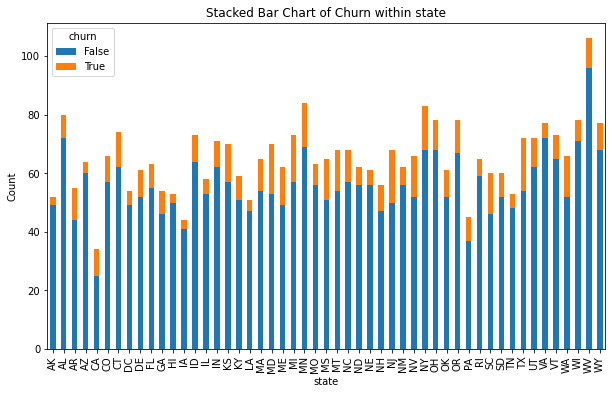

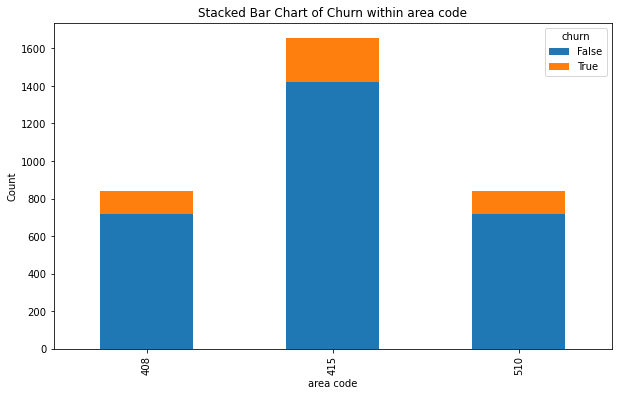

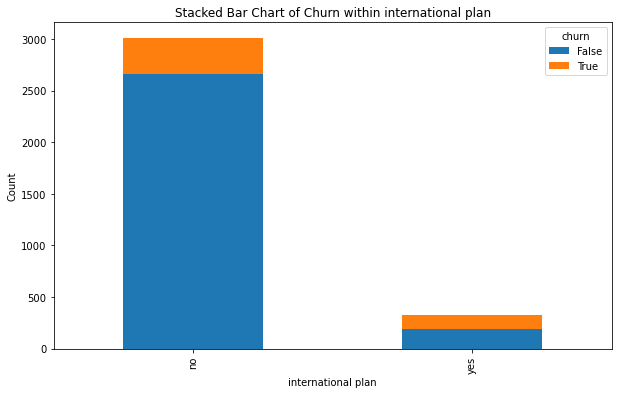

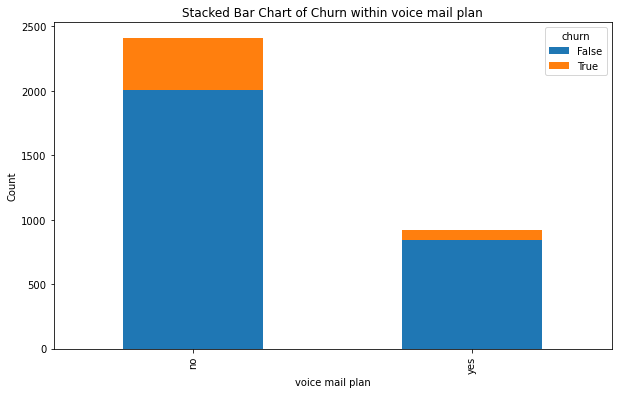

In [314]:
# Visualization of customer churn in each categoric feature
for col in categorical_cols:
    crosstab = pd.crosstab(df[col], df['churn'])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Bar Chart of Churn within {col}')
    plt.ylabel('Count')
    plt.show()

**Observation:**

 From the visualizations above, 42% of the customers with an international plan left SyriaTel incomparison to 11% of those that don't have an international plan. Syriatel should focus on boosting international calls to improve customer satisfaction for those with international plans.

The customer churn for those without a voice mail plan is higher than the customers with a plan, at 16% versus 8%. There is no impact of area codes on customer churn, though 50% of the data is from Area code 415.

#### Numeric Features Analysis

#### Analysis 2: Explore the Impact of Numeric Features on Customer Churn:

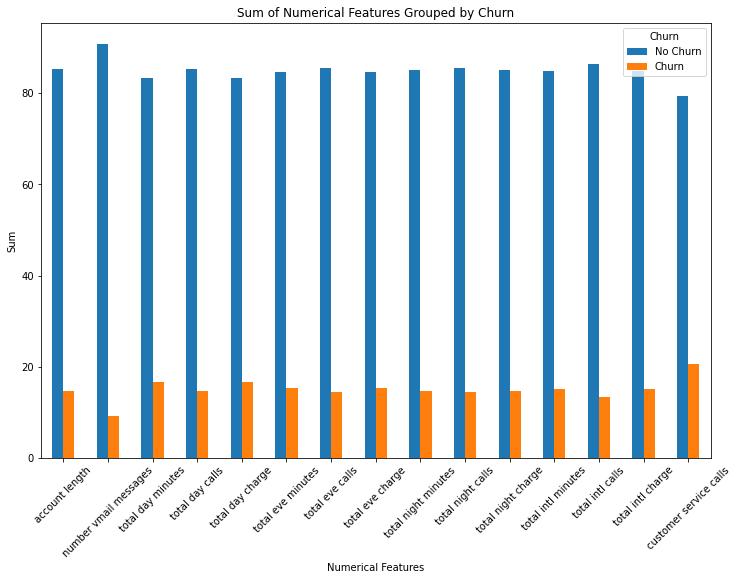

Percentage distribution of numerical columns grouped by churn:
       account length  number vmail messages  total day minutes  \
churn                                                             
False       85.279161              90.846114          83.320911   
True        14.720839               9.153886          16.679089   

       total day calls  total day charge  total eve minutes  total eve calls  \
churn                                                                          
False        85.378728         83.320956          84.684419        85.443882   
True         14.621272         16.679044          15.315581        14.556118   

       total eve charge  total night minutes  total night calls  \
churn                                                             
False         84.684517            85.194035          85.466299   
True          15.315483            14.805965          14.533701   

       total night charge  total intl minutes  total intl calls  \
churn      

In [315]:

import matplotlib.pyplot as plt
summed_data = df.groupby('churn')[numerical_cols].sum()
percentage_data = summed_data.div(summed_data.sum(axis=0), axis=1) * 100
percentage_data.T.plot(kind='bar', figsize=(12, 8))
plt.title('Sum of Numerical Features Grouped by Churn')
plt.ylabel('Sum')
plt.xlabel('Numerical Features')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()
print("Percentage distribution of numerical columns grouped by churn:")
print(percentage_data)

**Observation:**

From the chart above, the most significant numeric value on customer churn is customer service calls. Customers with more service call are more likely to discontinue their service with SyriaTel.

### Correlation Heatmap for Numeric Features

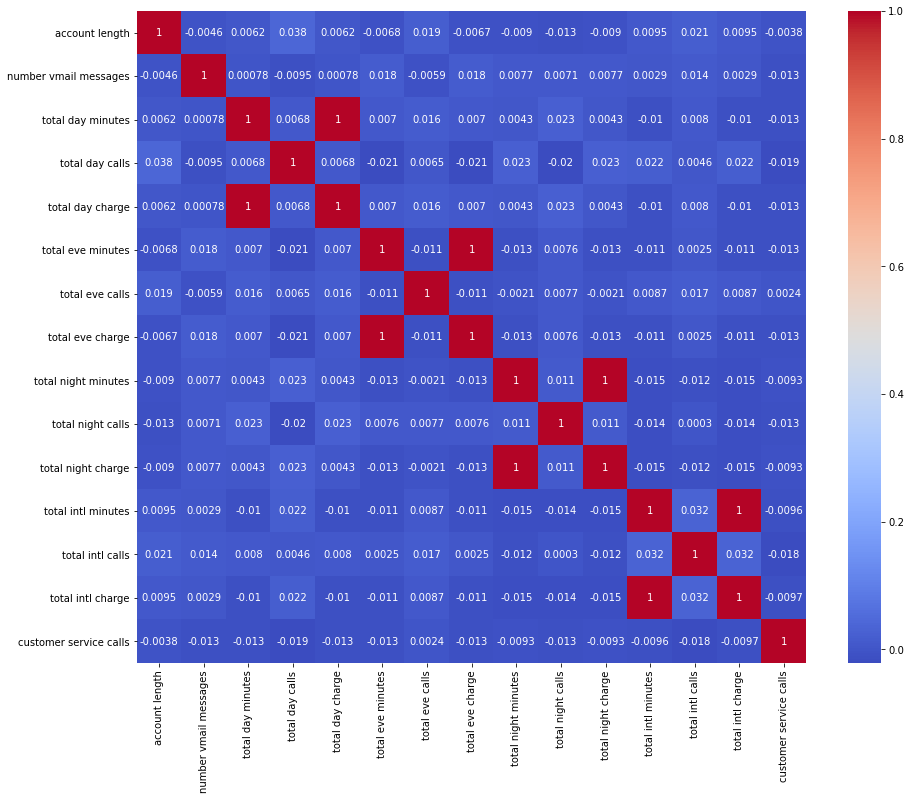

In [316]:

plt.subplots(figsize=(15,12))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

Some of the numeric features have perfect correlation since the values in one column are derived from the other column:

* Total day charge and total day minutes.
* Total eve charge and total eve minutes.
* Total night charge and total night minutes. 
* Total intl charge and total intl minutes. 

I'll drop the columns with minutes and remain with the columns with charges.

In [317]:
df.drop(['total intl minutes', 'total eve minutes', 'total night minutes', 'total day minutes'], axis=1, inplace=True)
df.shape

(3333, 16)

### Train-Test Split 

In [318]:
# Split the data into training and testing data at 80,20 ratio
df['churn'] = df['churn'].map({True: 1, False: 0}).astype('int') 
X = df.drop(['churn'], axis=1)
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Preprocessing

I've used onehotencoder to convert each categorical value into a new binary column with 0 or 1 for each unique value.

In [327]:
X_train_categorical = X_train[['state','area code','international plan','voice mail plan']]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

ohe.fit(X_train_categorical)
# Create new column names with prefixes
new_column_names = []
for col, categories in zip(X_train_categorical.columns, ohe.categories_):
    new_column_names.extend([f"{col}_{category}" for category in categories])

# Create the DataFrame with the new column names
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=new_column_names
)

X_train_ohe

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Normalization

In [320]:
X_train_numeric = X_train.drop(['state','area code','international plan','voice mail plan'], axis=1)
scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
817,1.000000,0.000000,0.459259,0.266892,0.370588,0.450016,0.598592,0.648536,0.315789,0.329630,0.222222
1373,0.442149,0.000000,0.555556,0.314189,0.647059,0.532514,0.422535,0.499701,0.210526,0.205556,0.444444
679,0.305785,0.000000,0.355556,0.631250,0.652941,0.899385,0.500000,0.497310,0.473684,0.435185,0.111111
56,0.578512,0.000000,0.503704,0.356926,0.364706,0.494985,0.669014,0.316796,0.105263,0.400000,0.111111
1993,0.351240,0.000000,0.488889,0.613682,0.452941,0.732449,0.542254,0.513449,0.157895,0.225926,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1095,0.433884,0.000000,0.666667,0.780574,0.482353,0.546102,0.204225,0.370592,0.157895,0.300000,0.111111
1130,0.500000,0.000000,0.237037,0.093412,0.523529,0.497250,0.176056,0.614465,0.105263,0.635185,0.111111
1294,0.268595,0.000000,0.340741,0.244088,0.652941,0.720479,0.647887,0.434549,0.263158,0.459259,0.111111
860,0.694215,0.000000,0.600000,0.507095,0.764706,0.481721,0.415493,0.552899,0.315789,0.494444,0.222222


In [321]:
# Join the numeric and categorical features to one dataframe.
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)

### Addressing Class Imbalance

The binary classes in the target feature (churn) are not evenly distributed as illustrated below.

0    2850
1     483
Name: churn, dtype: int64


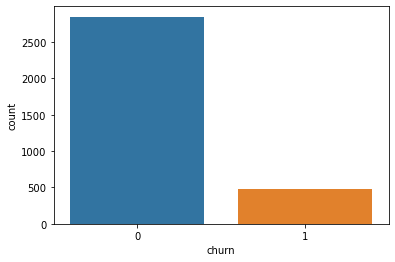

In [322]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn')
plt.show()

* 14.5% of the data in the churn feature is true, this shows class imbalance which I will address using SMOTE, an oversampling technique.

1    0.5
0    0.5
Name: churn, dtype: float64


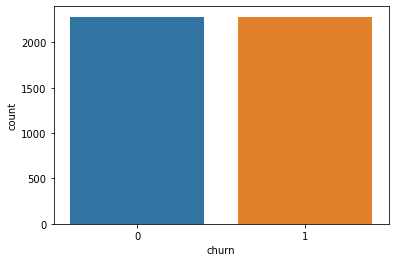

In [339]:
smote = SMOTE()
X_train_full.columns = [str(col) for col in X_train_full.columns]
y_train.name = 'churn'
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train)
print(y_train_resampled.value_counts(normalize=True))
sns.countplot(data=y_train_resampled, x=y_train_resampled)
plt.show()
